In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
Zomato1 = pd.read_excel(r'C:\Users\larry\Downloads\Country-Code.xlsx')
Zomato1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [3]:
Zomato2 = pd.read_excel(r"C:\Users\larry\OneDrive\Desktop\PROJECT\zomato.xlsx")
Zomato2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
Zomato1 = Zomato1.rename(columns={'Country Code':'country_Code'})

In [5]:
Zomato1.head()

,country_Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
Zomato = pd.concat([Zomato1,Zomato2], axis=1)
Zomato.head()

,country_Code,Country,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1.0,India,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,14.0,Australia,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,30.0,Brazil,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,37.0,Canada,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,94.0,Indonesia,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
Zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_Code          15 non-null     float64
 1   Country               15 non-null     object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   Country Code          9551 non-null   int64  
 5   City                  9551 non-null   object 
 6   Address               9551 non-null   object 
 7   Locality              9551 non-null   object 
 8   Locality Verbose      9551 non-null   object 
 9   Longitude             9551 non-null   float64
 10  Latitude              9551 non-null   float64
 11  Cuisines              9542 non-null   object 
 12  Average Cost for two  9551 non-null   int64  
 13  Currency              9551 non-null   object 
 14  Has Table booking     9551 non-null   object 
 15  Has Online delivery  

In [8]:
Zomato.isnull().sum()

country_Code            9536
Country                 9536
Restaurant ID              0
Restaurant Name            0
Country Code               0
City                       0
Address                    0
Locality                   0
Locality Verbose           0
Longitude                  0
Latitude                   0
Cuisines                   9
Average Cost for two       0
Currency                   0
Has Table booking          0
Has Online delivery        0
Is delivering now          0
Switch to order menu       0
Price range                0
Aggregate rating           0
Rating color               0
Rating text                0
Votes                      0
dtype: int64

In [9]:
Zomato.nunique()

country_Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [10]:
Zomato.shape

(9551, 23)

In [11]:
Zomato['Country'].isna().sum()

9536

In [12]:
Zomato['country_Code'].isna().sum()

9536

A data set of 9551 rows and 23 columns, that contains object,float64 and integer data type. since the country and the Country code has 90% null values so i will drop the column

In [13]:
columns_to_drop = ['Country','Restaurant ID','country_Code']
Zomato = Zomato.drop(columns=columns_to_drop,axis=1)
Zomato.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [14]:
Zomato.columns.tolist()

['Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [15]:
Zomato.isna().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

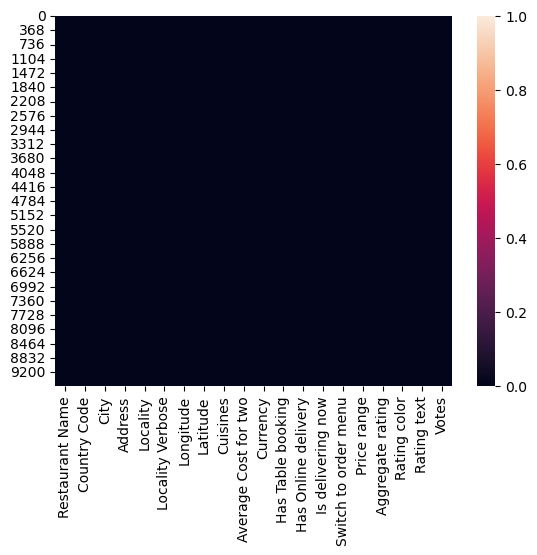

In [16]:
sns.heatmap(Zomato.isnull())
plt.show()

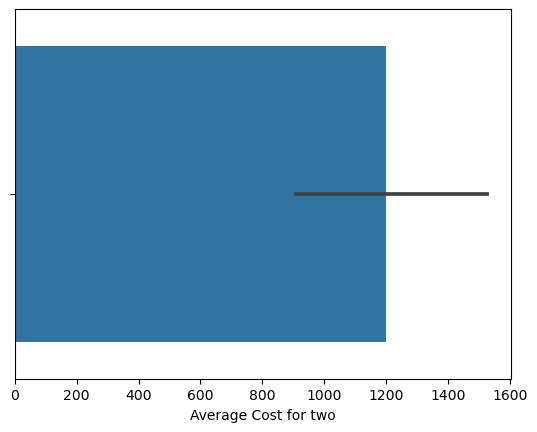

In [17]:
ax = sns.barplot(x = 'Average Cost for two',data = Zomato)


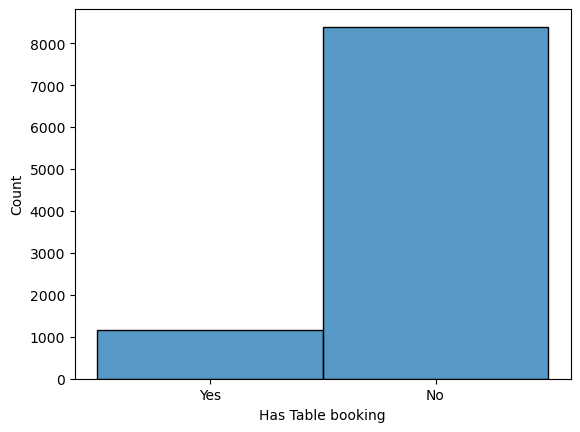

In [18]:
ax = sns.histplot(x = 'Has Table booking',data = Zomato)

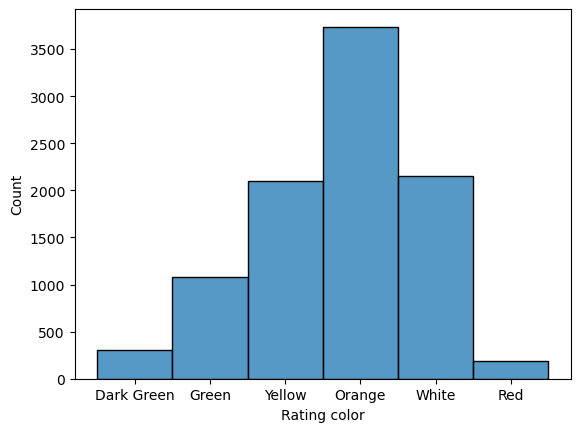

In [19]:
ax = sns.histplot(x = 'Rating color',data = Zomato)

<AxesSubplot:xlabel='Rating color', ylabel='Price range'>

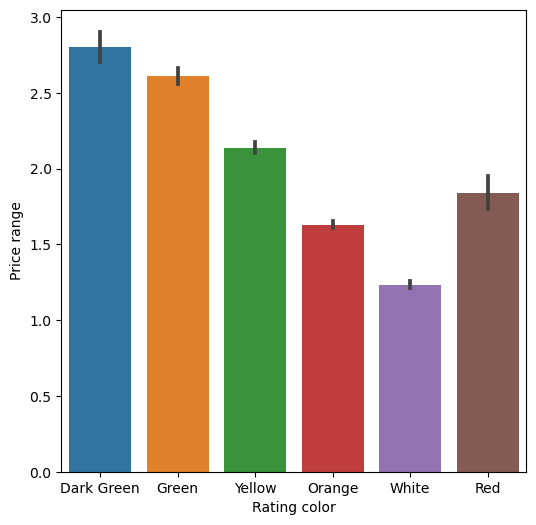

In [20]:
plt.figure(figsize=(6,6))
sns.barplot(x = 'Rating color', y = 'Price range', data = Zomato)

<Figure size 1000x4000 with 0 Axes>

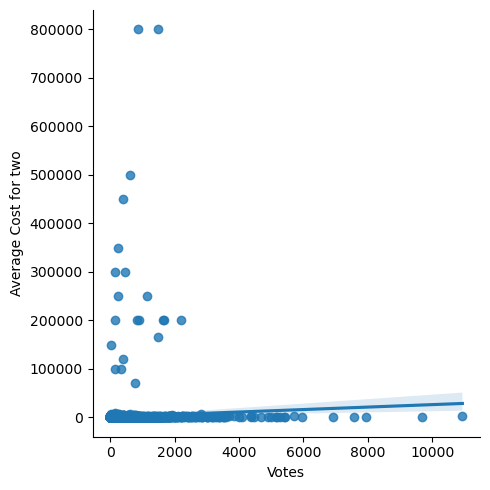

In [21]:
plt.figure(figsize=(10,40))
sns.lmplot(x = 'Votes', y = 'Average Cost for two', data = Zomato)

<Figure size 1000x4000 with 0 Axes>

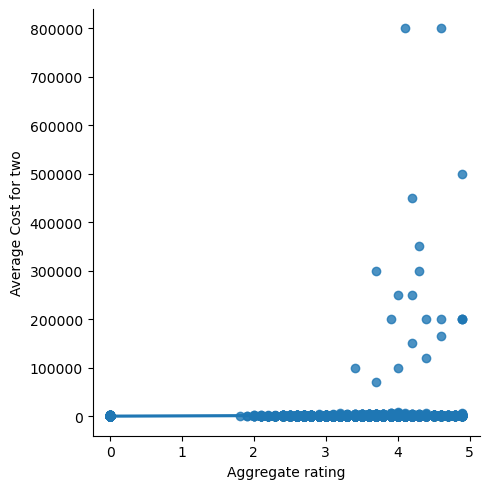

In [22]:
plt.figure(figsize=(10,40))
sns.lmplot(x = 'Aggregate rating', y = 'Average Cost for two', data = Zomato)

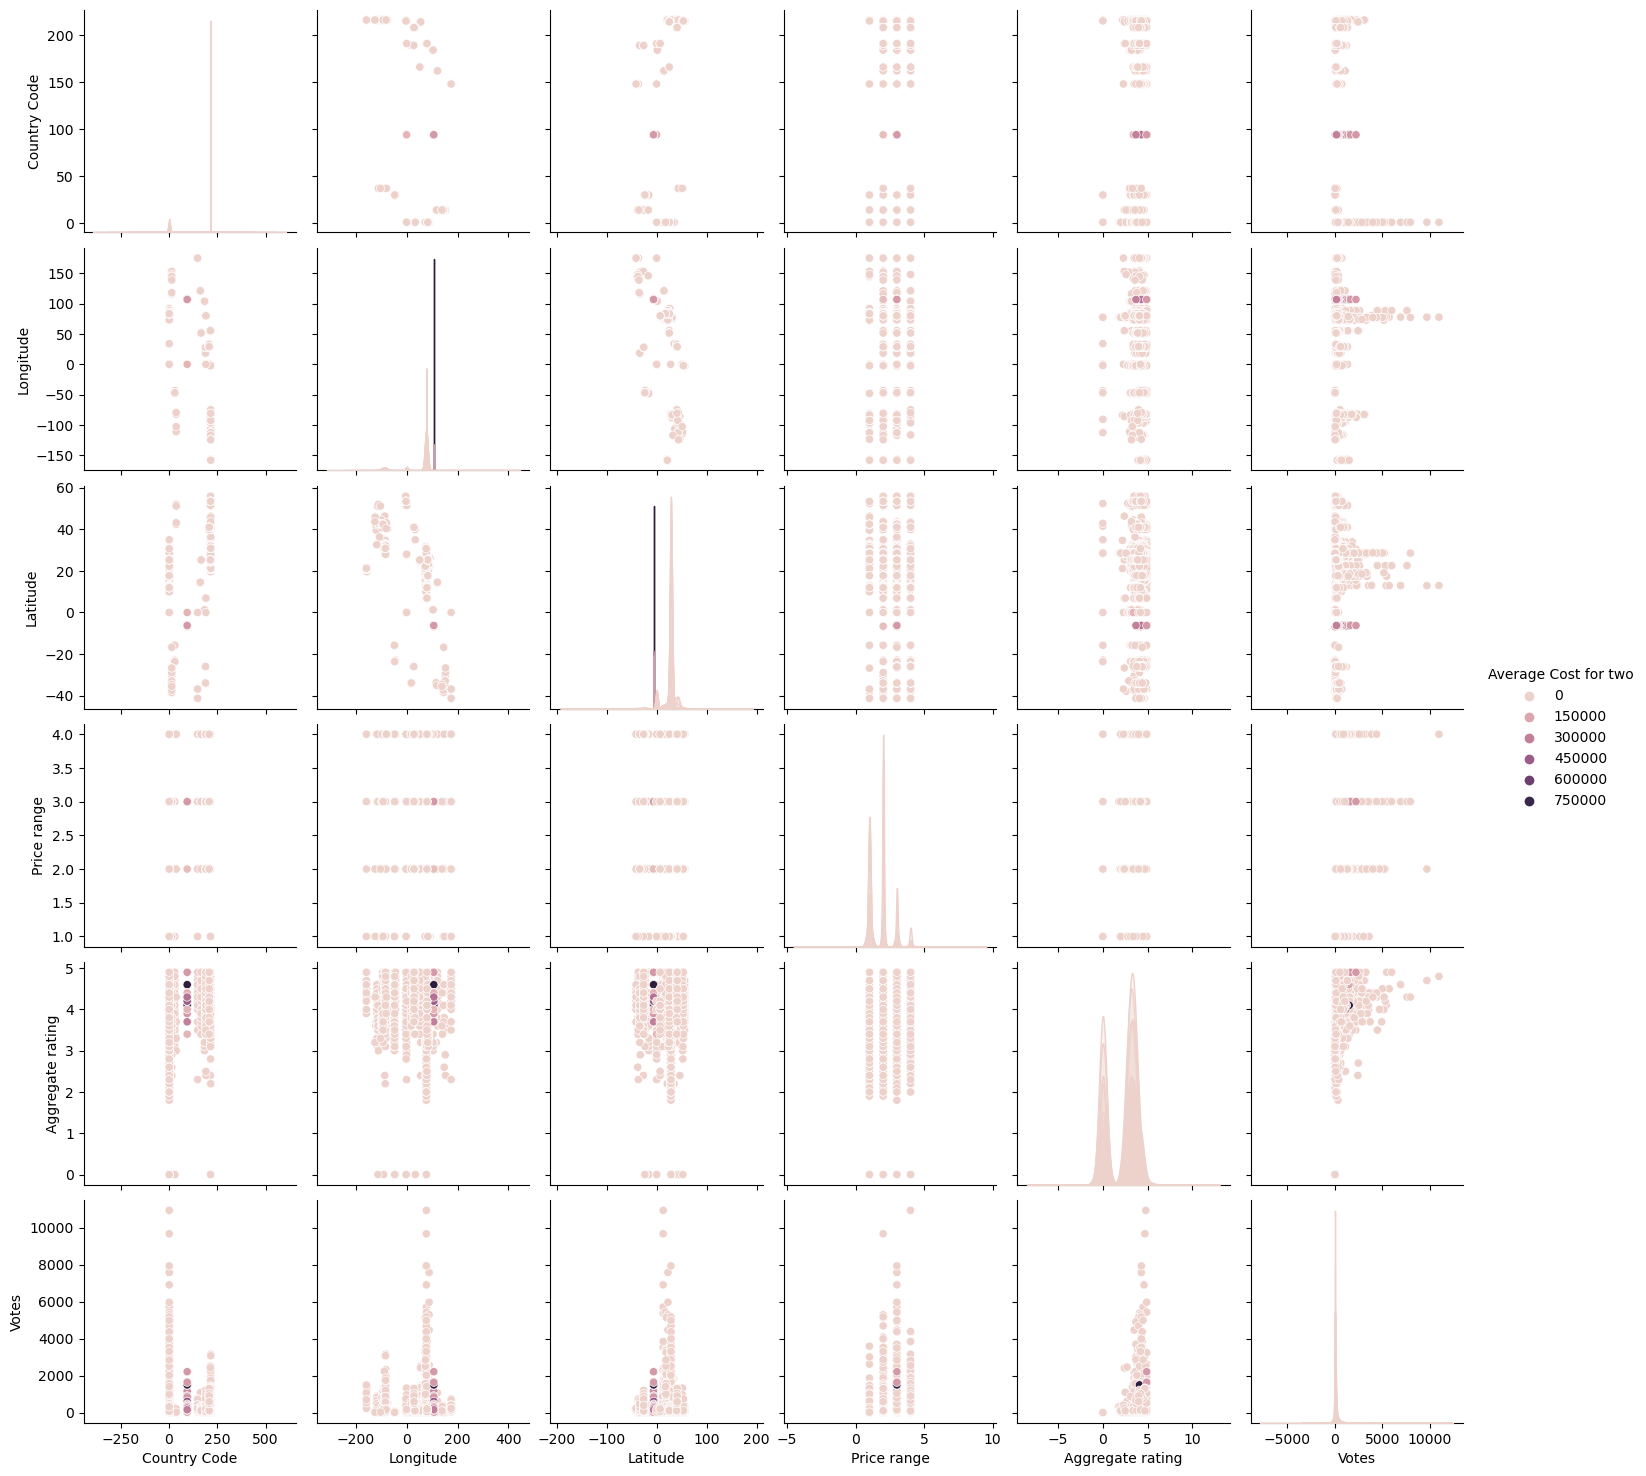

In [23]:
sns.pairplot(Zomato, hue = 'Average Cost for two')
plt.show()

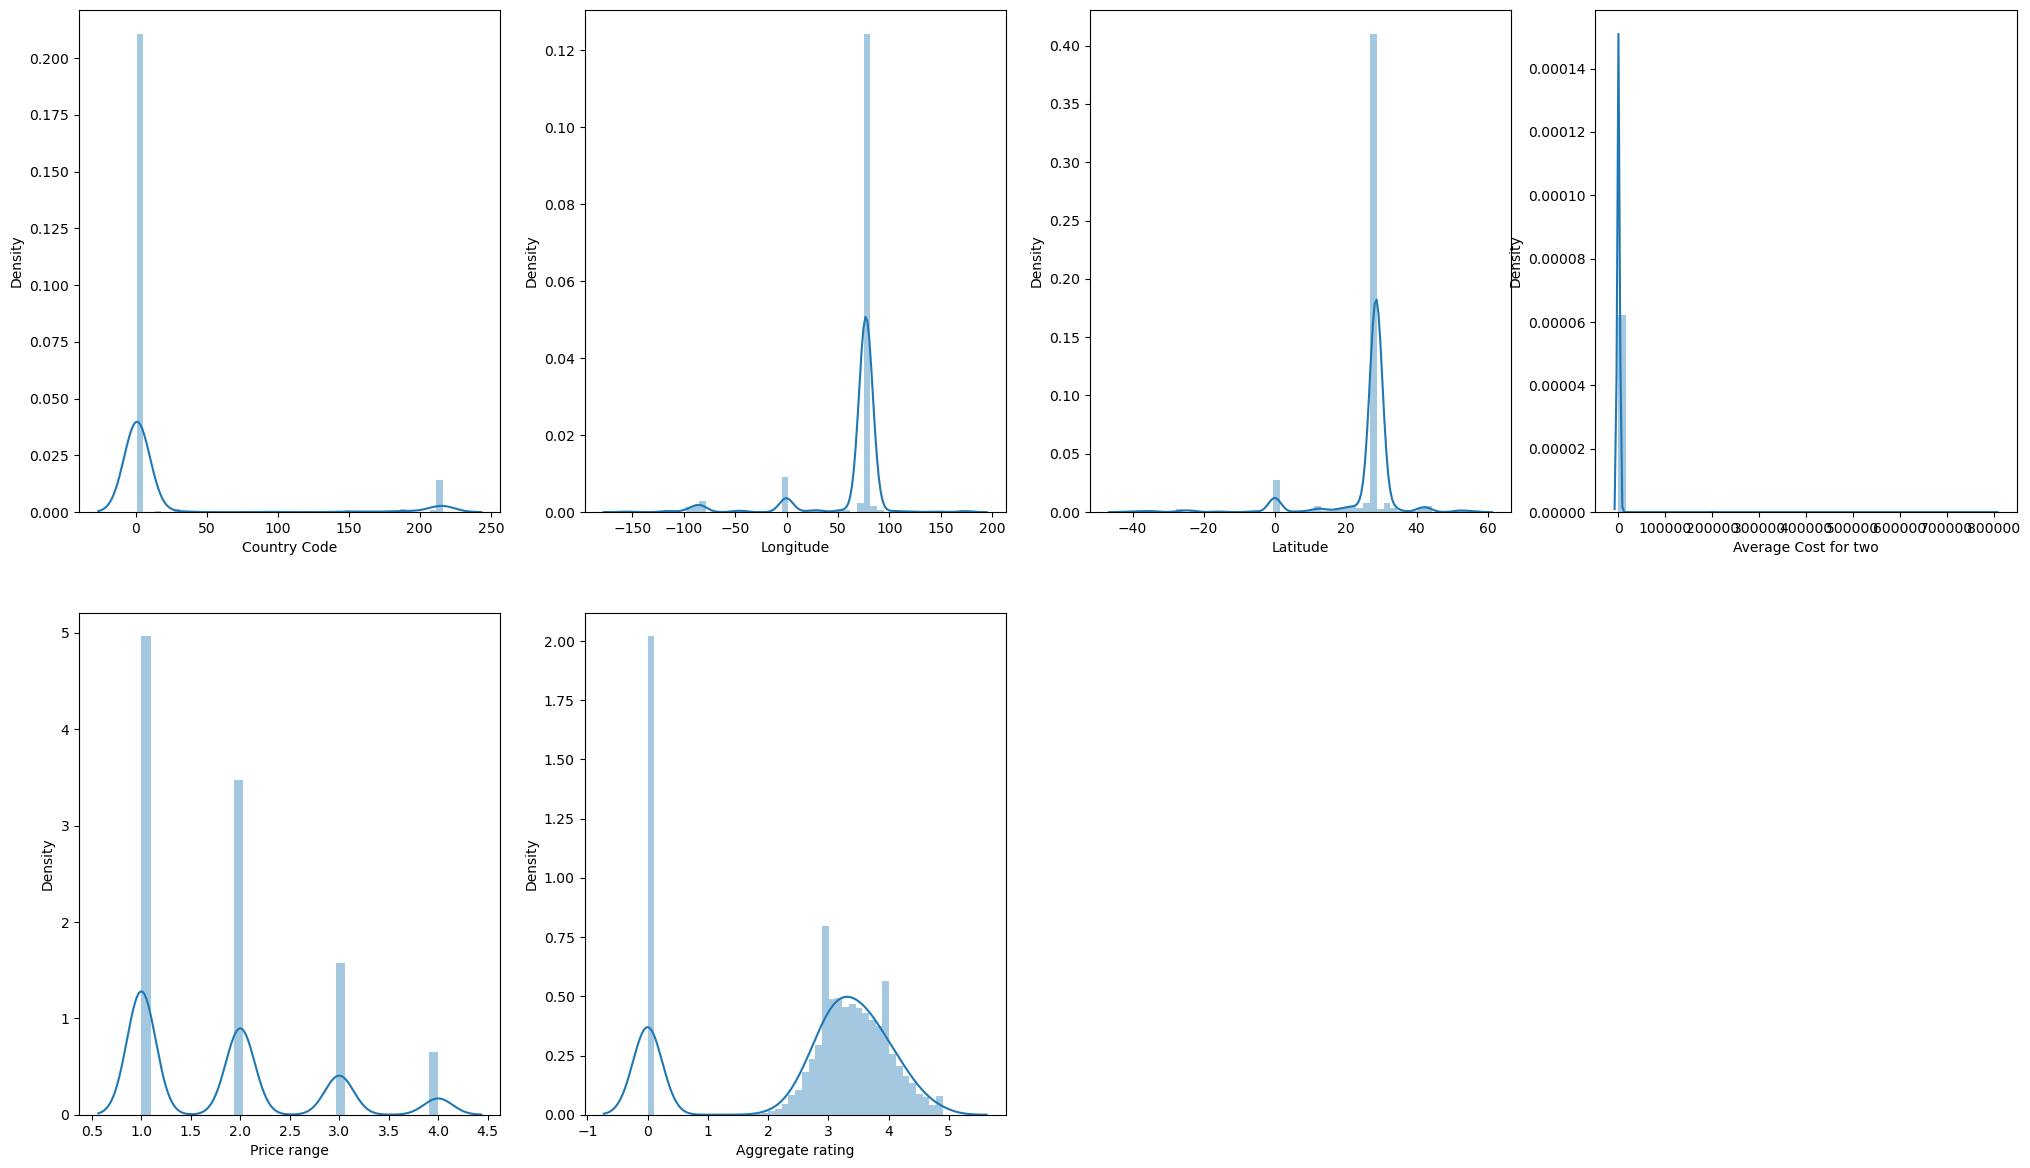

In [24]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Zomato.columns:
    if pd.api.types.is_numeric_dtype(Zomato[column]):
        if plotnumber<=6:
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(Zomato[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

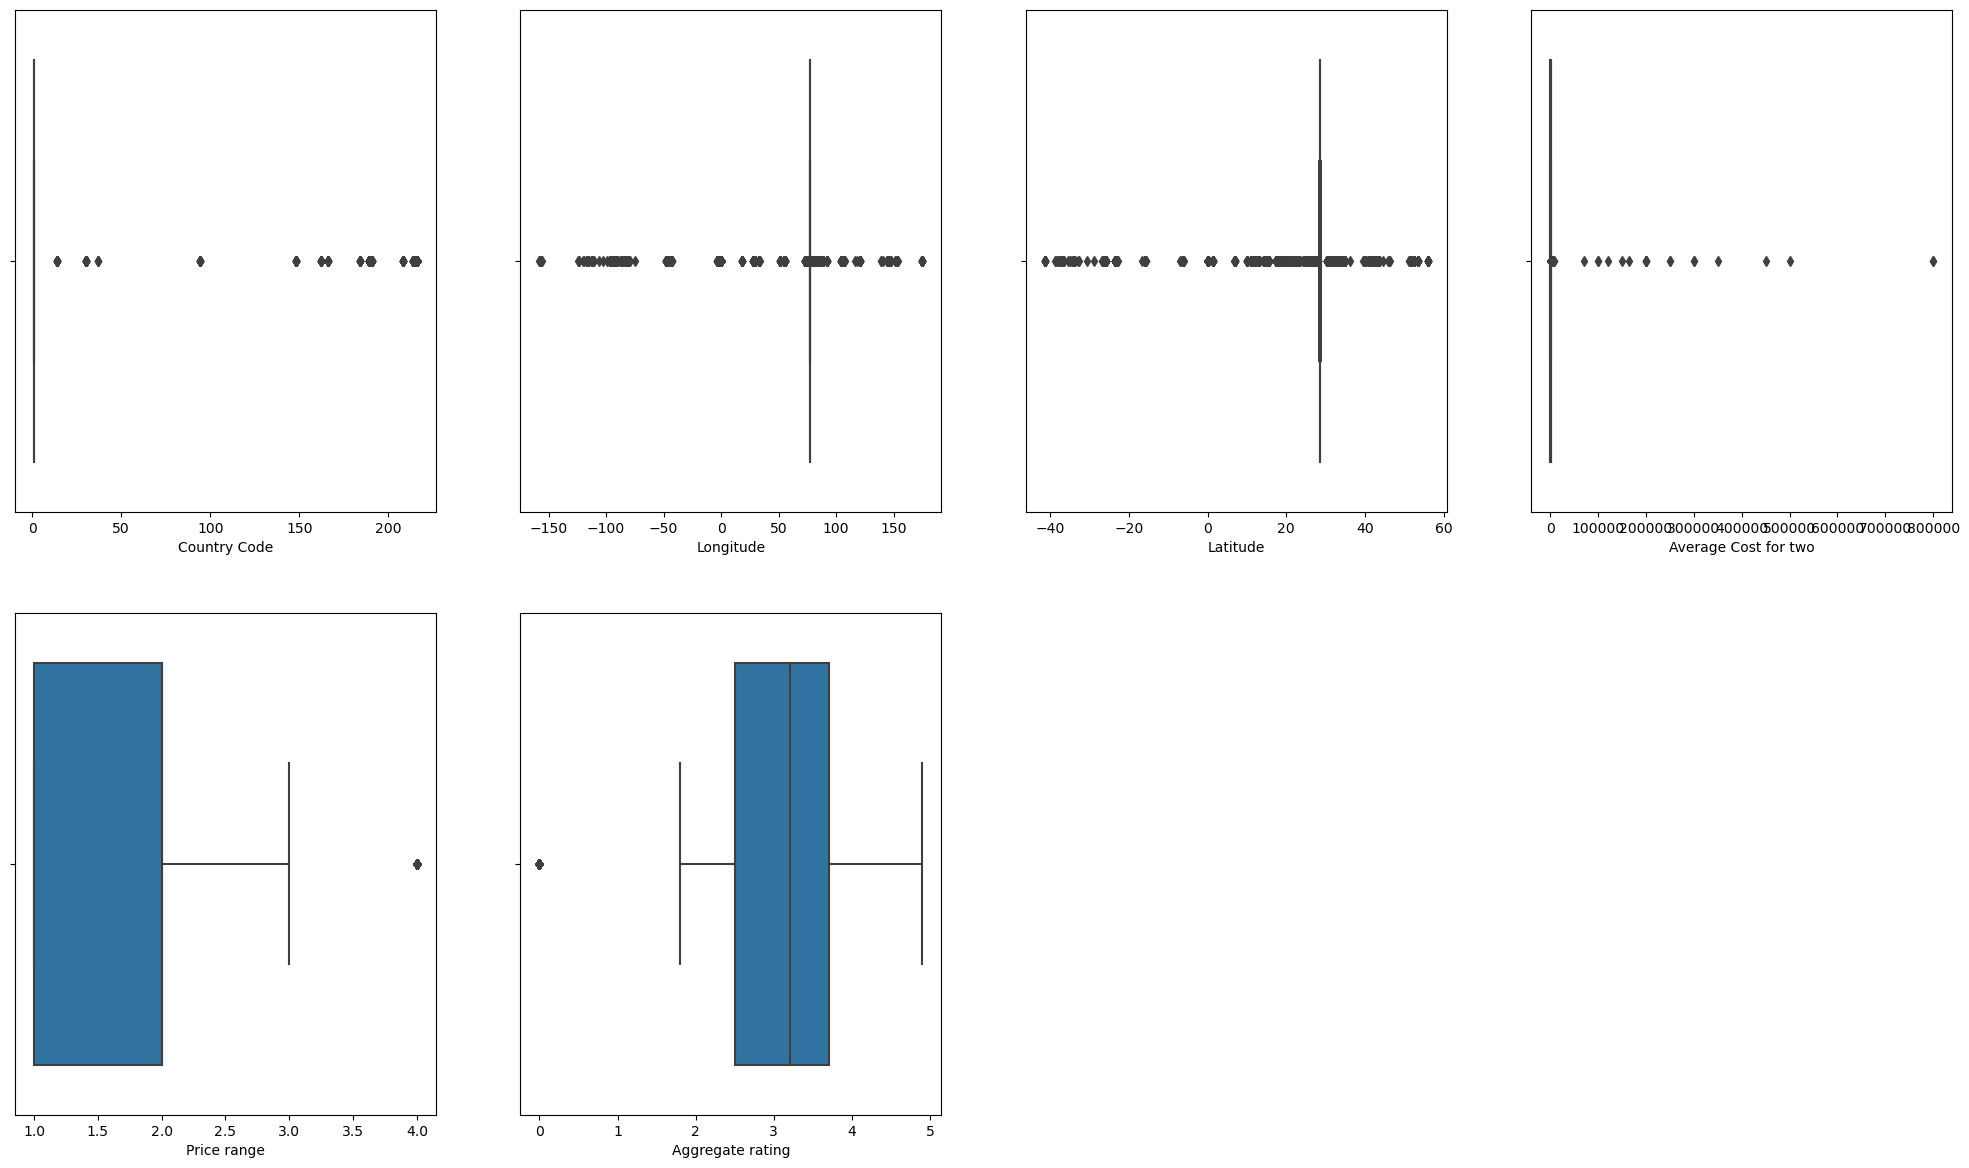

In [25]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Zomato.columns:
    if pd.api.types.is_numeric_dtype(Zomato[column]):
        if plotnumber<=6:
            ax = plt.subplot(4,4,plotnumber)
            sns.boxplot(Zomato[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

In [26]:
Zomato.skew()

Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

In [27]:
for i in Zomato.columns:
     if Zomato[i].dtypes=='object':
        Zomato[i]=Zomato[i].str.replace(r'\d+','')

In [28]:
label_encoder = OrdinalEncoder()
for i in Zomato.columns:
     if Zomato[i].dtypes=='object':
        Zomato[i]=label_encoder.fit_transform(Zomato[i].values.reshape(-1,1))

In [29]:
Zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9550 non-null   float64
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   float64
 3   Address               9551 non-null   float64
 4   Locality              9551 non-null   float64
 5   Locality Verbose      9551 non-null   float64
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   float64
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   float64
 11  Has Table booking     9551 non-null   float64
 12  Has Online delivery   9551 non-null   float64
 13  Is delivering now     9551 non-null   float64
 14  Switch to order menu  9551 non-null   float64
 15  Price range          

In [30]:
Zomato.isna().sum()

Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [31]:
Zomato['Restaurant Name']=Zomato['Restaurant Name'].fillna(Zomato['Restaurant Name'].mode()[0])

In [32]:
Zomato['Cuisines']=Zomato['Cuisines'].fillna(Zomato['Cuisines'].mode()[0])

In [33]:
Zomato.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [34]:
Features = Zomato.drop(columns = ['Average Cost for two'])
Label = Zomato['Average Cost for two']

In [35]:
scaler = StandardScaler()
Features = pd.DataFrame(scaler.fit_transform(Features),columns = Features.columns)
Features

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0.040676,2.531111,-0.228533,1.529445,-1.583888,-1.587095,1.372269,-1.025581,-0.135100,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.319803,1.407131,-1.977859,-0.465442,0.365202
1,-0.228076,2.531111,-0.228533,0.496784,-0.167179,-0.173798,1.371945,-1.026647,0.236387,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.319803,1.209281,-1.977859,-0.465442,1.009168
2,-0.357077,2.531111,-0.142317,-0.060716,-1.126552,-1.121618,1.372975,-1.024131,1.325565,-4.351046,2.692181,-0.587547,-0.059771,0.0,2.424090,1.143331,-1.308053,1.895070,0.262911
3,0.487973,2.531111,-0.142317,1.531590,0.740615,0.733546,1.372966,-1.023775,0.265562,-4.351046,-0.371446,-0.587547,-0.059771,0.0,2.424090,1.473081,-1.977859,-0.465442,0.483766
4,0.868900,2.531111,-0.142317,1.531161,0.740615,0.733546,1.372991,-1.023854,0.257782,-4.351046,2.692181,-0.587547,-0.059771,0.0,2.424090,1.407131,-1.977859,-0.465442,0.167595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.365048,3.341718,2.659685,0.443178,-0.414759,-0.423401,-0.847685,1.378025,1.601750,7.681415,-0.371446,-0.587547,-0.059771,0.0,1.319803,0.945480,-1.308053,1.895070,1.467151
9547,-1.098834,3.341718,2.659685,0.458617,-0.301285,-0.312092,-0.846144,1.376849,1.623144,7.681415,-0.371446,-0.587547,-0.059771,0.0,1.319803,1.011430,-1.308053,1.895070,2.039049
9548,-0.276685,3.341718,2.659685,0.460332,-0.294407,-0.301972,-0.846305,1.381025,0.234442,7.681415,-0.371446,-0.587547,-0.059771,0.0,2.424090,0.681680,1.371170,0.124686,1.171903
9549,-1.468543,3.341718,2.659685,0.460761,-0.294407,-0.301972,-0.846272,1.381221,1.298336,7.681415,-0.371446,-0.587547,-0.059771,0.0,2.424090,0.879530,-1.308053,1.895070,1.729853


In [36]:
Pca = PCA()
Pca.fit_transform(Features)

array([[ 3.53910587e+00, -1.30958372e+00,  1.64270364e-01, ...,
         3.73251954e+00, -3.05824094e-03, -3.65812300e-17],
       [ 2.81445716e+00, -8.04538720e-01,  1.75822500e+00, ...,
         3.71077056e+00, -5.09456210e-03, -2.49191880e-16],
       [ 3.79701122e+00, -7.70433300e-01,  8.39816385e-01, ...,
         3.37379242e+00,  3.24772230e-03, -2.18537528e-16],
       ...,
       [ 1.67075754e+00, -1.01294428e+00,  1.18306280e+00, ...,
        -6.56977629e-01, -4.51132500e-03,  3.20964605e-17],
       [ 2.53679402e+00, -1.17620613e+00,  1.88968587e+00, ...,
        -9.32984138e-01, -4.06671058e-03,  2.67999464e-17],
       [ 1.77543281e+00,  3.54484187e-02,  1.78216138e+00, ...,
        -7.32591504e-01,  1.84607357e-04,  2.45651267e-17]])

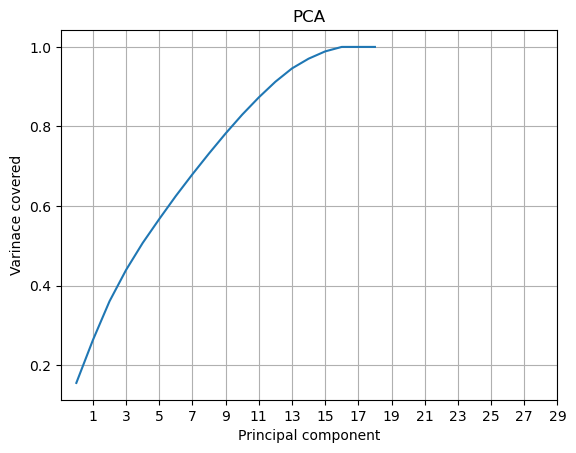

In [37]:
plt.figure()
plt.plot(np.cumsum(Pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,31,2))
plt.xlabel('Principal component')
plt.ylabel('Varinace covered')
plt.title('PCA')
plt.show()

I am choosing 16 component in building my model i Am good to choose this because it cover 70% of the data variance



In [38]:
Pca = PCA(n_components = 16)
New_pcomp = Pca.fit_transform(Features)
New_Features = pd.DataFrame(New_pcomp)
New_Features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3.539106,-1.309584,0.164270,-0.437575,-1.217359,-1.053346,-1.324922,0.669264,1.299467,-3.404658,1.538337,0.677245,-0.078049,-1.284745,-0.506013,-0.298299
1,2.814457,-0.804539,1.758225,-0.819635,-1.435661,-1.350292,-1.295209,0.490257,1.610271,-2.295799,1.626477,0.539810,-0.875080,-1.035478,-0.355156,-0.137439
2,3.797011,-0.770433,0.839816,1.077654,-1.936376,-1.766141,-0.703859,0.436935,2.185342,-1.608685,1.293383,-0.326836,-0.735569,-1.961312,-1.871440,-0.103657
3,1.783739,-0.024636,2.652219,-1.206027,-0.518990,-0.730443,-0.682529,1.097679,0.835860,-2.566135,2.319848,0.051795,0.430411,-0.399383,-2.208924,1.439664
4,2.138285,-1.141816,3.161380,-0.644143,-1.553040,-1.588089,-0.592150,0.849831,1.161992,-3.408399,1.275507,0.355565,-0.269387,-1.141544,-1.007458,0.318109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,2.235862,-1.004902,1.449276,1.743016,3.498293,-1.098742,1.885926,-0.333638,-0.591326,4.704918,-3.386579,1.655359,5.238244,0.082083,0.718686,-0.392443
9547,2.297442,-1.001030,1.619498,1.730618,3.555366,-0.671597,0.957443,-0.853667,0.278561,5.235021,-3.200366,1.659020,5.307347,0.322550,0.834929,-0.373582
9548,1.670758,-1.012944,1.183063,1.978182,2.475391,-0.322663,0.926598,-0.399587,-0.804989,3.838081,-5.059979,1.194776,4.876164,2.459585,0.927906,0.759850
9549,2.536794,-1.176206,1.889686,1.986322,3.486291,-0.523648,0.586886,-0.886163,0.465764,4.975912,-3.706375,1.567113,5.305279,0.207979,0.474408,0.430082


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor as DT

In [40]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(New_Features,Label,test_size = .30, random_state = i)
    knn= KNN()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.7753730903635868 
 random state =  175


In [41]:
x_train,x_test,y_train,y_test = train_test_split(New_Features,Label, test_size = 0.30, random_state = MaxRS)

In [44]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_knn))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_knn))
print ('Mean squared Error:', mean_squared_error(y_test,pred_knn))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.7753730903635868
R2 score on training Data: 0.5752273329380905
Mean absolute Error: 365.44689462665735
Mean squared Error: 14450106.76401954
Root mean squared Error: 3801.3296047593058


In [45]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rfr))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rfr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rfr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.0443923482712385
R2 score on training Data: 0.8936375786050001
Mean absolute Error: 649.7331332868108
Mean squared Error: 61473634.72321996
Root mean squared Error: 7840.512401828082


In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: -0.006493009915027992
R2 score on training Data: 2.475653496749197
Mean absolute Error: 1864.9796114087792
Mean squared Error: 64747057.57227709
Root mean squared Error: 8046.555634075806


In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
score1 = cross_val_score(rfr,New_Features,Label,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference =',(r2_score(y_test,pred_rfr)-score1.mean()))

[-1.63633087e+03 -3.14366867e+01 -1.89442235e+00  7.60055113e-01
 -4.80320874e-03]
-333.7813445989476
difference = 333.82573694721884


In [49]:
score2 = cross_val_score(lr,New_Features,Label,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('difference =',(r2_score(y_test,pred_lr)-score2.mean()))

[-2.14378830e+02 -2.46017958e+01 -4.12826278e+00 -1.68505213e+00
 -3.12932778e-03]
-48.959414043587614
difference = 48.95292103367259


In [50]:
score3 = cross_val_score(knn,New_Features,Label,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('difference =',(r2_score(y_test,pred_knn)-score3.mean()))

[-1.94073000e+02 -6.02918173e+01  7.01965270e-01  6.51550340e-01
 -5.12488378e-03]
-50.60328536793397
difference = 51.37865845829756


In [57]:
from sklearn.model_selection import GridSearchCV
params_grid = {'fit_intercept':[True,False],
             'copy_X': [ True, False],
             'n_jobs':[1,2,6,8],
             'positive':[True,False],
              
             }
grid_search =GridSearchCV(estimator=lr, param_grid = params_grid, cv = 5)


In [58]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, 2, 6, 8],
                         'positive': [True, False]})

In [59]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}


In [60]:
final_model = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= 1,positive=False)

In [61]:
final_model

LinearRegression(n_jobs=1)

In [62]:
final_model.fit(x_train,y_train)
prediction = final_model.predict(x_test)
print ('R2 score:', r2_score(y_test,prediction))
print ('Mean absolute Error:', mean_absolute_error(y_test,prediction))
print ('Mean squared Error:', mean_squared_error(y_test,prediction))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))

R2 score: -0.006493009915027992
Mean absolute Error: 1864.9796114087792
Mean squared Error: 64747057.57227709
Root mean squared Error: 8046.555634075806


In [63]:
import joblib

In [64]:
import pickle
filename = 'Zomato.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [65]:
import pickle
loaded_final_model=pickle.load(open(filename,'rb'))
result = loaded_final_model.score(x_test,y_test)
print(result*100)

-0.6493009915027992
